In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency
import os
import csv
from pathlib import Path

stroke_data_to_load = Path(r"C:\Users\Kels\Stroke-Prediction-Analysis\healthcare-dataset-stroke-data.csv")

# Read in the data. 
stroke_data_df = pd.read_csv(stroke_data_to_load)
stroke_data_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#  Create new data frame.
new_stroke_data_df = stroke_data_df.drop(columns=['ever_married', 'work_type', 'avg_glucose_level'])
new_stroke_data_df.dropna(inplace=True)
new_stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,Residence_type,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Urban,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Rural,32.5,never smoked,1
3,60182,Female,49.0,0,0,Urban,34.4,smokes,1
4,1665,Female,79.0,1,0,Rural,24.0,never smoked,1
5,56669,Male,81.0,0,0,Urban,29.0,formerly smoked,1


In [3]:
# load the dataset 
dataset_file = 'new_stroke_data_df.csv'
new_stroke_data_df = pd.read_csv(dataset_file)

# Select the columns using loc or iloc
column_names = ['stroke', 'Residence_type']
selected_columns = new_stroke_data_df.loc[:, column_names]

# Sort the values in the selected columns
sorted_columns = selected_columns.sort_values(by=['stroke', 'Residence_type'])

# Print the sorted columns
print(sorted_columns)


     stroke Residence_type
209       0          Rural
212       0          Rural
213       0          Rural
216       0          Rural
217       0          Rural
..      ...            ...
195       1          Urban
197       1          Urban
199       1          Urban
200       1          Urban
204       1          Urban

[4909 rows x 2 columns]


In [4]:

# Load the dataset
dataset_file = 'new_stroke_data_df.csv'
new_stroke_data_df = pd.read_csv(dataset_file)

# Create a contingency table
contingency_table = pd.crosstab(new_stroke_data_df['Residence_type'], new_stroke_data_df['stroke'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)



Chi-square statistic: 0.12382469623434333
p-value: 0.7249227580411615


The null hypothesis is that there is no association between the two variables. 

In [5]:

# load the dataset 
dataset_file = 'new_stroke_data_df.csv'
new_stroke_data_df = pd.read_csv(dataset_file)

# select the column using loc or iloc 
column_name = 'Residence_type'
selected_column = new_stroke_data_df.loc[:, 'Residence_type']

# sort the values in the selected column 
sorted_column = selected_column.sort_values()
# Count the occurrences of each category
category_counts = selected_column.value_counts()

# Calculate the percentages
percentages = (category_counts / category_counts.sum()) * 100

# Print the percentages
print(percentages)




Urban    50.723162
Rural    49.276838
Name: Residence_type, dtype: float64


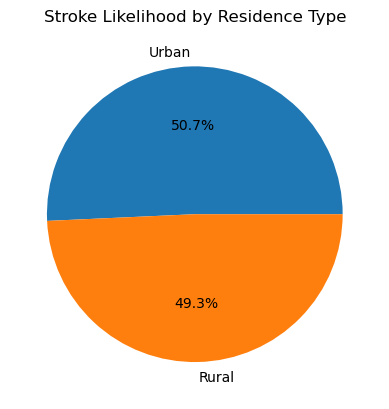

In [16]:
dataset_file = 'new_stroke_data_df.csv'
new_stroke_data_df = pd.read_csv(dataset_file)

# Count the occurrences of each unique value in the "Residence_type" column
counts = new_stroke_data_df['Residence_type'].value_counts()

# Get the values and labels for the pie chart
values = counts.values
labels = counts.index

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Stroke Likelihood by Residence Type')
plt.show()